In [1]:
# Initial imports
import requests
import pandas as pd
from pathlib import Path
import os

path = os.getcwd()

print(path)

C:\workspace\project\Project-1


In [2]:
# set path
gold_csv_path = Path("Resources/gold_price.csv")
wages_csv_path = Path("Resources/annual_yearly_wages_20_years.csv")


In [3]:
gold_price_df = pd.read_csv(gold_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
annual_wages_df = pd.read_csv(wages_csv_path, index_col="TIME", parse_dates=True, infer_datetime_format=True)


In [4]:
gold_price_df.head()
gold_df = gold_price_df.copy()

In [5]:
annual_wages_df.head()

LOCATION INDICATOR SUBJECT MEASURE FREQUENCY        Value  \
TIME                                                                   
1999-01-01      AUS    AVWAGE     TOT     USD         A  46056.21709   
2000-01-01      AUS    AVWAGE     TOT     USD         A  46156.00471   
2001-01-01      AUS    AVWAGE     TOT     USD         A  46658.38049   
2002-01-01      AUS    AVWAGE     TOT     USD         A  46979.50613   
2003-01-01      AUS    AVWAGE     TOT     USD         A  47529.08855   

            Flag Codes  
TIME                    
1999-01-01         NaN  
2000-01-01         NaN  
2001-01-01         NaN  
2002-01-01         NaN  
2003-01-01         NaN

In [6]:
annual_wages_df.drop(columns=['Flag Codes','SUBJECT','FREQUENCY','INDICATOR', 'MEASURE'],inplace=True)
annual_wages_df.head()

LOCATION        Value
TIME                            
1999-01-01      AUS  46056.21709
2000-01-01      AUS  46156.00471
2001-01-01      AUS  46658.38049
2002-01-01      AUS  46979.50613
2003-01-01      AUS  47529.08855

In [7]:
annual_wages_df.rename(columns={"Value":"annual_wage", "LOCATION":"country", "TIME":"Date"},inplace=True)
annual_wages_df.head()

country  annual_wage
TIME                           
1999-01-01     AUS  46056.21709
2000-01-01     AUS  46156.00471
2001-01-01     AUS  46658.38049
2002-01-01     AUS  46979.50613
2003-01-01     AUS  47529.08855

In [8]:
gold_price_df.drop(columns=['Open','High','Low','Change %'],inplace=True)
gold_price_df.head()

Price
Date                
2019-12-19  1,479.15
2019-12-18  1,475.44
2019-12-17  1,476.45
2019-12-16  1,476.25
2019-12-13  1,475.81

In [9]:
gold_price_df['Price'] = gold_price_df['Price'].str.replace(',','')
#df[‘Close’] = _df[‘Close’].str.replace(‘,, ‘’)
gold_price_df['Price'] = gold_price_df['Price'].astype(float)
#gold_price_df['Price'] = pd.to_numeric(gold_price_df['Price'],errors='coerce')
#gold_price_df['Price'] = (gold_price_df['Price'])
gold_price_df.dtypes

Price    float64
dtype: object

In [10]:
gold_price_df.head()

Price
Date               
2019-12-19  1479.15
2019-12-18  1475.44
2019-12-17  1476.45
2019-12-16  1476.25
2019-12-13  1475.81


Bad key "text.kerning_factor" on line 4 in
C:\Users\haris\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


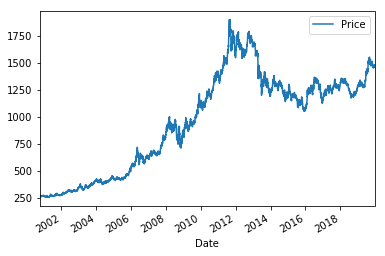

In [11]:
%matplotlib inline

gold_price_df.plot()

In [12]:
annual_wages_df.index = annual_wages_df.index.year
annual_wages_df.head()
annual_wages_df.groupby(['TIME','country']).max().head()

annual_wage
TIME country             
1999 AUS      46056.21709
     AUT      48169.25513
     BEL      51546.10314
     CAN      42877.79254
     CHE      57506.51012

In [13]:
pivot_df = annual_wages_df.pivot_table(values = 'annual_wage', index=['TIME'], columns=['country'])
pivot_df.head()

country          AUS          AUT          BEL          CAN          CHE  \
TIME                                                                       
1999     46056.21709  48169.25513  51546.10314  42877.79254  57506.51012   
2000     46156.00471  48301.77172  51082.82873  44177.81325  57849.93181   
2001     46658.38049  48178.32743  51241.62980  43996.98695  60006.65200   
2002     46979.50613  48888.55160  52823.82568  43630.12866  60939.25781   
2003     47529.08855  49031.32592  53134.35824  43646.42193  60787.38637   

country          CHL          CZE          DEU          DNK          ESP  ...  \
TIME                                                                      ...   
1999     17975.05937  16295.81187  45055.95807  45558.58899  38780.92795  ...   
2000     17945.35541  16836.35095  45309.74183  45532.48395  37933.31735  ...   
2001     18437.02921  17682.55417  45655.08020  45837.00049  37735.25209  ...   
2002     18597.52173  18752.99864  45929.54614  46890.28766  37923.89394  ...   
2003     18999.73228  20169.95749  46082.95538  48058.11301  37732.97884  ...   

country          NLD          NOR          NZL         OECD          POL  \
TIME                                                                       
1999     50199.47754  37292.68382  32717.31136  40897.16521  20781.54631   
2000     51451.00556  37616.38812  32873.21857  41766.08881  20903.45334   
2001     52213.46174  38542.37008  33478.36732  42190.29334  22141.83061   
2002     52390.26181  40140.26416  34112.58897  42363.03600  22075.51096   
2003     52761.49574  40678.93459  35358.68885  42771.11076  22346.52368   

country          PRT          SVK          SVN          SWE          USA  
TIME                                                                      
1999     27143.42048  14817.17188  27728.05225  33429.20117  52848.89044  
2000     27514.63243  15378.29333  28428.57293  34485.65431  54641.50930  
2001     27626.23531  15377.68270  29585.65631  34883.85589  55103.64980  
2002     27612.59548  16171.46851  29671.11328  35338.88404  55537.49696  
2003     27549.69606  16483.93807  30293.46986  35640.42420  56218.66004  

[5 rows x 36 columns]

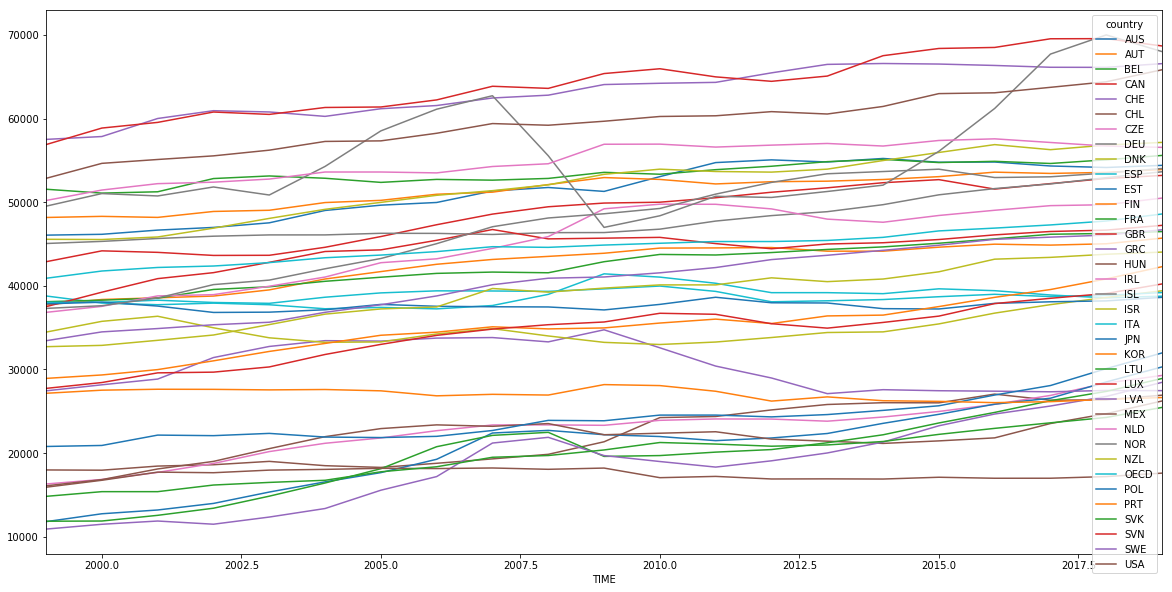

In [14]:
pivot_df.plot(figsize=[20,10])

In [15]:
annual_wages_df['hourly_wage'] = annual_wages_df['annual_wage'] / (52 * 40)
annual_wages_df.head()

country  annual_wage  hourly_wage
TIME                                  
1999     AUS  46056.21709    22.142412
2000     AUS  46156.00471    22.190387
2001     AUS  46658.38049    22.431914
2002     AUS  46979.50613    22.586301
2003     AUS  47529.08855    22.850523

In [16]:
pivot_hourly_df = annual_wages_df.pivot_table(values = 'hourly_wage', index=['TIME'], columns=['country'])
pivot_hourly_df.head()

country        AUS        AUT        BEL        CAN        CHE       CHL  \
TIME                                                                       
1999     22.142412  23.158296  24.781780  20.614323  27.647361  8.641855   
2000     22.190387  23.222006  24.559052  21.239333  27.812467  8.627575   
2001     22.431914  23.162657  24.635399  21.152398  28.849352  8.863956   
2002     22.586301  23.504111  25.396070  20.976023  29.297720  8.941116   
2003     22.850523  23.572753  25.545365  20.983857  29.224705  9.134487   

country       CZE        DEU        DNK        ESP  ...        NLD        NOR  \
TIME                                                ...                         
1999     7.834525  21.661518  21.903168  18.644677  ...  24.134364  17.929175   
2000     8.094399  21.783530  21.890617  18.237172  ...  24.736060  18.084802   
2001     8.501228  21.949558  22.037019  18.141948  ...  25.102626  18.529986   
2002     9.015865  22.081513  22.543408  18.232641  ...  25.187626  19.298204   
2003     9.697095  22.155267  23.104862  18.140855  ...  25.366104  19.557180   

country        NZL       OECD        POL        PRT       SVK        SVN  \
TIME                                                                       
1999     15.729477  19.662099   9.991128  13.049721  7.123640  13.330794   
2000     15.804432  20.079850  10.049737  13.228189  7.393410  13.667583   
2001     16.095369  20.283795  10.645111  13.281844  7.393117  14.223873   
2002     16.400283  20.366844  10.613226  13.275286  7.774744  14.264958   
2003     16.999370  20.563034  10.743521  13.245046  7.924970  14.564168   

country        SWE        USA  
TIME                           
1999     16.071731  25.408120  
2000     16.579641  26.269956  
2001     16.771085  26.492139  
2002     16.989848  26.700720  
2003     17.134819  27.028202  

[5 rows x 36 columns]

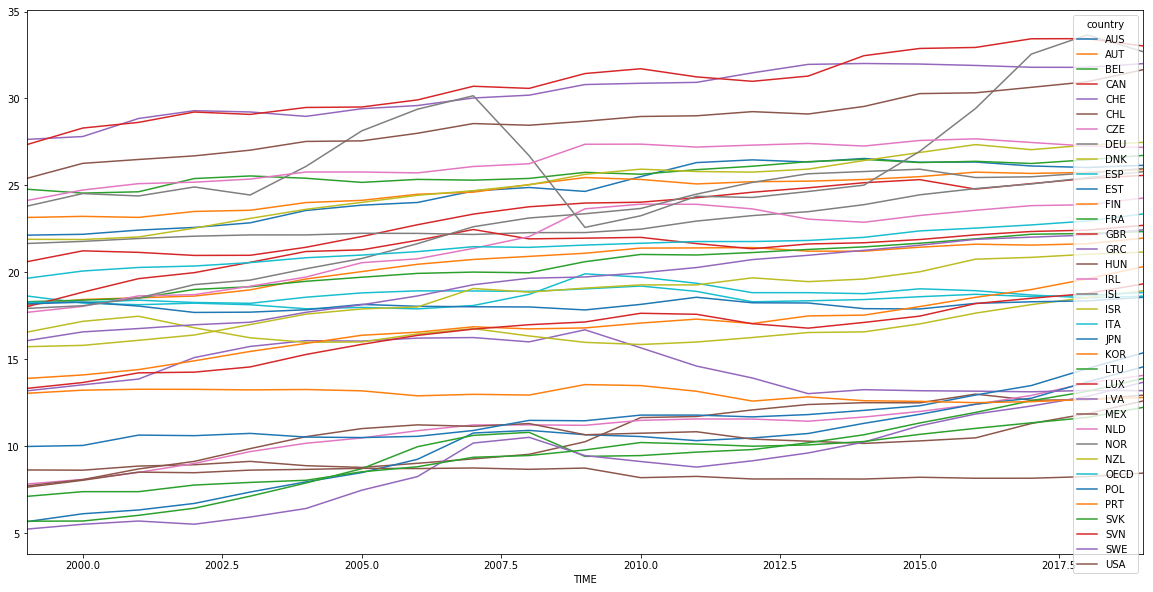

In [17]:
pivot_hourly_df.plot(figsize=[20,10])

In [18]:
gold_price_year_df = gold_price_df.copy()
gold_price_year_df.index = gold_price_df.index.year
gold_price_year_df.head()

Price
Date         
2019  1479.15
2019  1475.44
2019  1476.45
2019  1476.25
2019  1475.81

In [19]:
avg_gold_price_df = gold_price_year_df.groupby('Date').mean()
avg_gold_price_df.head()

Price
Date            
2000  269.283871
2001  271.370462
2002  310.700308
2003  364.215692
2004  409.897088

In [20]:
annual_wages_df.head()

country  annual_wage  hourly_wage
TIME                                  
1999     AUS  46056.21709    22.142412
2000     AUS  46156.00471    22.190387
2001     AUS  46658.38049    22.431914
2002     AUS  46979.50613    22.586301
2003     AUS  47529.08855    22.850523

In [21]:
combine_df = pd.concat([avg_gold_price_df,pivot_hourly_df], axis=1)
for country in combine_df.columns:
    if country != 'Price':
        combine_df[country] = combine_df['Price'] / combine_df[country]

work_hours = combine_df.drop(columns=['Price'])
work_hours.head()

AUS        AUT        BEL        CAN        CHE        CHL  \
1999        NaN        NaN        NaN        NaN        NaN        NaN   
2000  12.135159  11.596064  10.964750  12.678546   9.682128  31.212001   
2001  12.097517  11.715860  11.015469  12.829300   9.406466  30.615049   
2002  13.756140  13.218977  12.234188  14.812164  10.604931  34.749611   
2003  15.939053  15.450707  14.257604  17.356947  12.462596  39.872596   

            CZE        DEU        DNK        ESP  ...        NLD        NOR  \
1999        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2000  33.267924  12.361811  12.301337  14.765660  ...  10.886288  14.890065   
2001  31.921325  12.363368  12.314300  14.958176  ...  10.810441  14.644936   
2002  34.461509  14.070608  13.782313  17.040883  ...  12.335434  16.099960   
2003  37.559258  16.439237  15.763595  20.077096  ...  14.358362  18.623119   

            NZL       OECD        POL        PRT        SVK        SVN  \
1999        NaN        NaN        NaN        NaN        NaN        NaN   
2000  17.038504  13.410651  26.795116  20.356821  36.422146  19.702377   
2001  16.860158  13.378683  25.492497  20.431686  36.705827  19.078521   
2002  18.944814  15.255201  29.274821  23.404415  39.962768  21.780667   
2003  21.425247  17.712157  33.900962  27.498258  45.957989  25.007655   

            SWE        USA  
1999        NaN        NaN  
2000  16.241839  10.250640  
2001  16.180853  10.243433  
2002  18.287409  11.636402  
2003  21.255882  13.475395  

[5 rows x 36 columns]

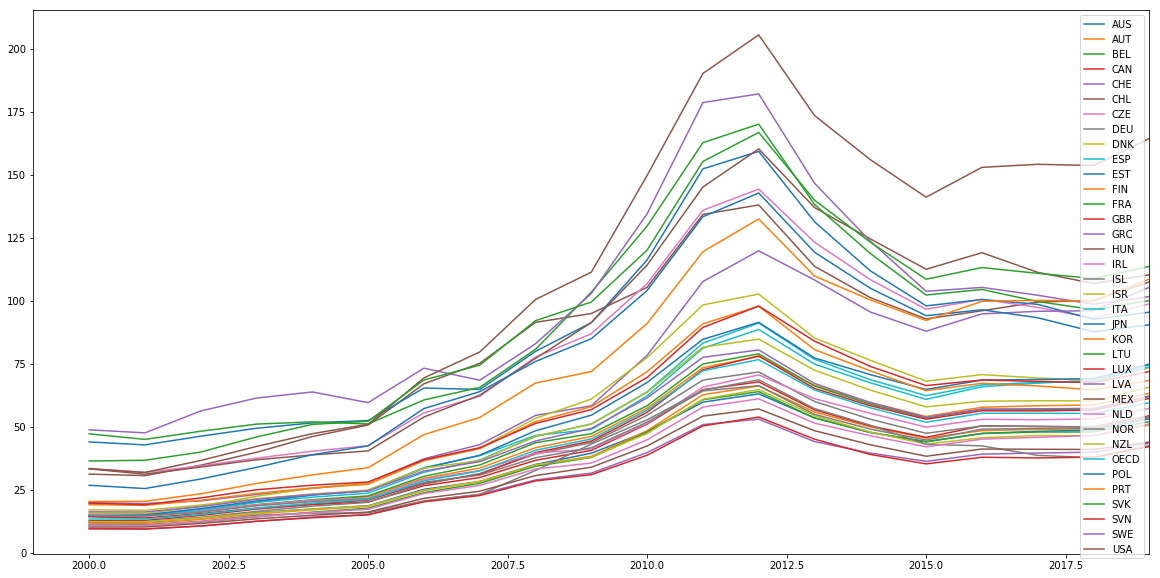

In [22]:
work_hours.plot(figsize=[20,10])

In [23]:
import hvplot.pandas

work_hours.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [24]:
gold_df_original = gold_df.copy()



In [25]:
gold_df = gold_df[["Open","High","Low","Price","Change %"]]
gold_df.rename(columns={"Open":"open","High":"high","Low":"low","Price":"close","Change %":"volume"},inplace = True);
gold_df.head()

open      high       low     close  volume
Date                                                      
2019-12-19  1,475.44  1,481.97  1,473.01  1,479.15   0.25%
2019-12-18  1,476.45  1,479.67  1,470.32  1,475.44  -0.07%
2019-12-17  1,476.25  1,480.78  1,474.23  1,476.45   0.01%
2019-12-16  1,475.60  1,480.03  1,472.99  1,476.25   0.03%
2019-12-13  1,469.47  1,478.22  1,462.48  1,475.81   0.43%

In [26]:

for columns in gold_df.columns:
#gold_df[gold_df.columns[1:4]] = gold_df[gold_df.columns[1:4]].apply(pd.to_numeric, errors='coerce')
    
    if columns != 'volume':
        
        gold_df[columns] = gold_df[columns].str.replace(',','')

        gold_df[columns] = gold_df[columns].astype(float)
gold_df.head()

open     high      low    close  volume
Date                                                  
2019-12-19  1475.44  1481.97  1473.01  1479.15   0.25%
2019-12-18  1476.45  1479.67  1470.32  1475.44  -0.07%
2019-12-17  1476.25  1480.78  1474.23  1476.45   0.01%
2019-12-16  1475.60  1480.03  1472.99  1476.25   0.03%
2019-12-13  1469.47  1478.22  1462.48  1475.81   0.43%

In [27]:
gold_df.columns = pd.MultiIndex.from_product([['GOLD'],gold_df.columns])
gold_df.head()

GOLD                                   
               open     high      low    close  volume
Date                                                  
2019-12-19  1475.44  1481.97  1473.01  1479.15   0.25%
2019-12-18  1476.45  1479.67  1470.32  1475.44  -0.07%
2019-12-17  1476.25  1480.78  1474.23  1476.45   0.01%
2019-12-16  1475.60  1480.03  1472.99  1476.25   0.03%
2019-12-13  1469.47  1478.22  1462.48  1475.81   0.43%

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

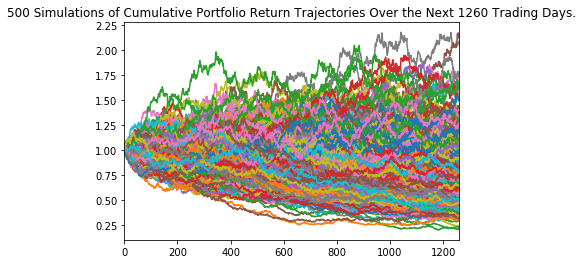

In [29]:
from MCForecastTools import MCSimulation

num_sims = 500

MC_GOLD = MCSimulation(
    portfolio_data = gold_df,
    num_simulation = num_sims,
    weights = [1],
    num_trading_days = 252 * 5
)

MC_GOLD.calc_cumulative_return()
line_plot = MC_GOLD.plot_simulation()
tbl = MC_GOLD.summarize_cumulative_return()

# Print summary statistics
print(tbl)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in AAPL stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")